In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
x=df[['Glucose','Insulin','DiabetesPedigreeFunction','Age','SkinThickness','BloodPressure','Pregnancies','BMI']]
x

,Glucose,Insulin,DiabetesPedigreeFunction,Age,SkinThickness,BloodPressure,Pregnancies,BMI
0,148,0,0.627,50,35,72,6,33.6
1,85,0,0.351,31,29,66,1,26.6
2,183,0,0.672,32,0,64,8,23.3
3,89,94,0.167,21,23,66,1,28.1
4,137,168,2.288,33,35,40,0,43.1
...,...,...,...,...,...,...,...,...
763,101,180,0.171,63,48,76,10,32.9
764,122,0,0.340,27,27,70,2,36.8
765,121,112,0.245,30,23,72,5,26.2
766,126,0,0.349,47,0,60,1,30.1


<AxesSubplot:xlabel='Pregnancies'>

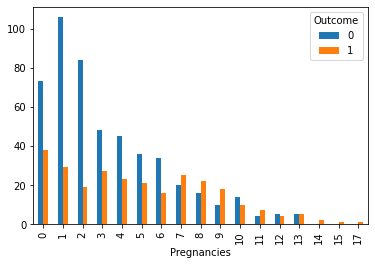

In [11]:
pd.crosstab(df.Pregnancies,df.Outcome).plot(kind='bar')

In [12]:
y=df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [14]:
len(x_train)

614

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
model=RandomForestClassifier(n_estimators=70)

In [17]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=70)

In [18]:
y_predicted=model.predict(x_test)

In [22]:
model.predict_proba([[85,0,0.351,31,29,66,1,26.5]])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.97142857, 0.02857143]])

In [23]:
model.predict_log_proba([[85,0,0.351,31,29,66,1,26.5]])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[-0.02898754, -3.55534806]])

In [19]:
model.score(x_test,y_test)

0.7467532467532467

In [20]:
import pickle
with open('model_pickle_main','wb') as f:
    pickle.dump(model,f)

In [21]:
with open('model_pickle_main','rb') as f:
    mp=pickle.load(f)

In [ ]:
mp.predict([[89,94,0.167,21,23,66,1]])

In [115]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[88, 13],
       [20, 33]], dtype=int64)

Text(69.0, 0.5, 'truth')

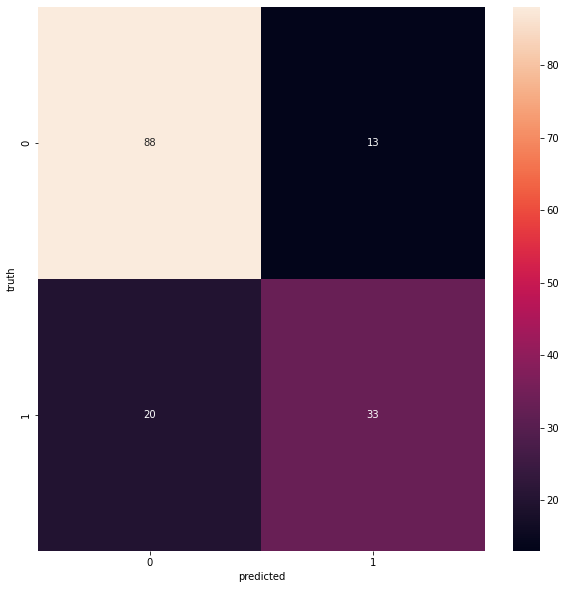

In [118]:
import seaborn as sb

plt.figure(figsize=(10,10))
sb.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')


In [16]:
model.predict([[85,0,0.351,31,29,66,1,26.5]])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)